In [1]:
## START ##
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Load the dataset
df = pd.read_csv('./data2021.student.csv')

In [3]:
import data_prep

df_train, df_test = data_prep.get_prepped_dataset(verbose=True, normalize=True)

# df_train.to_csv('./final_train.csv', index=False)
# df_test.to_csv('./final_test.csv', index=False)
df_train.to_csv('./data_me.csv', index=False)

print("Done!")

[v] Converting columns with >=30 unique values to categorical: ['Class', 'C2', 'C3', 'C5', 'C6', 'C7', 'C8', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C17', 'C18', 'C20', 'C21', 'C22', 'C23', 'C24', 'C26', 'C27', 'C28', 'C29', 'C30', 'C32']
[v] Removing columns with >=0.8 missing values: ['C11', 'C32']
[v] Normalising (min-max) numeric columns
[v] Dropping low-variance numeric columns: []
[v] Removing duplicate columns '['C12', 'C26', 'C31']'
[v] Dropping 2nd of high-corellation numeric columns: ['C25']
[v] Dropping highly monotonous (>=0.95) categorical cols: ['C2', 'C10', 'C15', 'C17', 'C30']
[v] Dropping high Cramer's V association categorical columns: []
[v] Dropping 1000 duplicate rows
[v] Dropped 0 columns that contained >0.5 missing values
[v] Final training set size: 900
[v] Final test set size: 100
[v] Final columns (22): ['Class', 'C1', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C13', 'C14', 'C16', 'C18', 'C19', 'C20', 'C21', 'C22', 'C23', 'C24', 'C27', 'C28', 'C29']
Done!


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

######## PREP STUFF #################
# Load the dataset
df = pd.read_csv('./data2021.student.csv')

df.dtypes

# Convert attributes with less than threshold unique values to categorical
lt_cat_threshold_cols = [col for col in df.columns if df[col].nunique() <= 10]
df[lt_cat_threshold_cols] = df[lt_cat_threshold_cols].astype('category')

# # Normalise (min-max) numeric columns
# numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
# for col in numeric_cols:
#     df[col] = (df[col]-df[col].min())/(df[col].max()-df[col].min())

######################################

##### Numeric Col variances
# numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
# df[numeric_cols].var()

#### Number of unique values in categorical
# cat_cols = df.select_dtypes(include=['category']).drop(['Class'], axis=1).columns
# # df[cat_cols].nunique

# #### Proportions of categorical cols made up of the same value
# cat_cols = df.select_dtypes(include=['category']).drop(['Class'], axis=1).columns
# for col in cat_cols:
#     print(f"{col}: {df[col].value_counts(normalize=True).max()}")

#### Basic duplicate detection
# duplicate_cols = df.transpose().duplicated()
# print(f"Removing duplicate columns '{list(df.columns[duplicate_cols])}'")
# df = df.drop(list(df.columns[duplicate_cols]), axis=1)

### Getting Correlation matrix for numeric attributes
# numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
# print(df[numeric_cols].corr())
# df = df.drop(high_cor_cols, axis=1)

           ID        C1        C4        C9       C16       C19       C25  \
ID   1.000000 -0.081143  0.038872  0.032181  0.007819 -0.013860  0.036843   
C1  -0.081143  1.000000 -0.036778  0.031626  0.075945  0.000106 -0.034494   
C4   0.038872 -0.036778  1.000000  0.620557  0.024229 -0.047899  1.000000   
C9   0.032181  0.031626  0.620557  1.000000 -0.004097 -0.065236  0.619632   
C16  0.007819  0.075945  0.024229 -0.004097  1.000000 -0.010017  0.022975   
C19 -0.013860  0.000106 -0.047899 -0.065236 -0.010017  1.000000 -0.048343   
C25  0.036843 -0.034494  1.000000  0.619632  0.022975 -0.048343  1.000000   
C31  0.032181  0.031626  0.620557  1.000000 -0.004097 -0.065236  0.619632   

          C31  
ID   0.032181  
C1   0.031626  
C4   0.620557  
C9   1.000000  
C16 -0.004097  
C19 -0.065236  
C25  0.619632  
C31  1.000000  


Unique Values
	The following columns have 20 or less unique values (likely categorical): ['Class', 'C2', 'C3', 'C5', 'C6', 'C7', 'C8', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C17', 'C18', 'C20', 'C21', 'C22', 'C23', 'C24', 'C26', 'C27', 'C28', 'C29', 'C30', 'C32']
Converting classes with less than 10 unique values to categorical...
Done!

Missing Values:
	The following columns have missing values: ['Class', 'C3', 'C4', 'C11', 'C13', 'C29', 'C32']
	The followng are the per-column missing data ratios: {'Class': 0.09090909090909091, 'C3': 0.006363636363636364, 'C4': 0.006363636363636364, 'C11': 0.9954545454545455, 'C13': 0.005454545454545455, 'C29': 0.005454545454545455, 'C32': 0.9954545454545455}

Useless Data:
	Class is just a label, so it's obviously useless

Duplicate Columns:
Analysing column correlations
	Numeric Column Correlations:


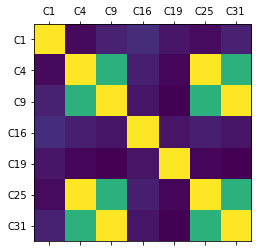

	Categorical Column Correlations:
CAT_CORS cols
Index(['C2', 'C3', 'C5', 'C6', 'C7', 'C8', 'C10', 'C11', 'C12', 'C13', 'C14',
       'C15', 'C17', 'C18', 'C20', 'C21', 'C22', 'C23', 'C24', 'C26', 'C27',
       'C28', 'C29', 'C30', 'C32'],
      dtype='object')
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]


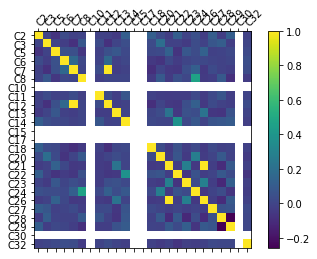


Duplicate Rows:
	Basic row duplication search identified 100 duplicate rows: [901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922, 923, 924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 935, 936, 937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949, 950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961, 962, 963, 964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 974, 975, 976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987, 988, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999, 1000]


In [13]:
import warnings
warnings.filterwarnings("ignore")

df_no_id = df.drop(['ID'], axis=1)
df_no_id_class = df.drop(['ID', 'Class'], axis=1)

## Column Investigation ##
## Unique Values
print("Unique Values")
lt_20_unique = [col for col in df.columns if df[col].nunique() <= 20]
print(f"\tThe following columns have 20 or less unique values (likely categorical): {lt_20_unique}")

print("Converting classes with less than 10 unique values to categorical...")
df[lt_20_unique] = df[lt_20_unique].astype('category')
print("Done!")

## Missing Values
print("\nMissing Values:")
# Find cols with any missing values
cols_with_missing = [col for col in df.columns if df[col].isnull().sum() > 0]
print(f"\tThe following columns have missing values: {cols_with_missing}")

# Find number of missing values per col
# Get proportion of each one missing
missing_ratios = [df[col].isnull().sum()/len(df) for col in df.columns]
missing_ratios_dict = {col:ratio for (col, ratio) in zip(list(df.columns), missing_ratios) if ratio > 0}
print(f"\tThe followng are the per-column missing data ratios: {missing_ratios_dict}")

## Useless Data
print("\nUseless Data:")
print(f"\tClass is just a label, so it's obviously useless") # TODO way to demonstrate this?

## Duplicate Columns
print("\nDuplicate Columns:")

print("Analysing column correlations")
# Numeric columns
numeric_cors = df_no_id.corr()
with open('./corr.txt', 'w') as save_file:
    save_file.write(numeric_cors.to_string())
print("\tNumeric Column Correlations:")
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(numeric_cors, interpolation='nearest')
ax.set_xticklabels(['']+list(numeric_cors.columns))
ax.set_yticklabels(['']+list(numeric_cors.columns))

plt.show()

# Categorical Columns
cat_cors = df_no_id_class.select_dtypes(include='category').apply(lambda x : pd.factorize(x)[0]).corr()

print("\tCategorical Column Correlations:")
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cat_cors, interpolation='nearest')
print("CAT_CORS cols")
print(cat_cors.columns)
fig.colorbar(cax)
n = len(cat_cors.columns)
print(np.arange(n))
ax.set_xticks(np.arange(n))
ax.set_xticklabels(list(cat_cors.columns))
ax.set_yticks(np.arange(n))
ax.set_yticklabels(list(cat_cors.columns))

plt.setp([tick.label1 for tick in ax.xaxis.get_major_ticks()], rotation=90,
         ha="right", va="center", rotation_mode="anchor")
# Rotate and align top ticklabels
plt.setp([tick.label2 for tick in ax.xaxis.get_major_ticks()], rotation=90,
         ha="left", va="center",rotation_mode="anchor")

plt.show()

print("\nDuplicate Rows:")
# duplicate_rows = df.iloc[]
duplicate_rows = df[df_no_id.duplicated()]
print(f"\tBasic row duplication search identified {len(duplicate_rows)} duplicate rows: {list(duplicate_rows['ID'])}")


# TODO outlier detection

In [ ]:
# Get some basic data
print(f"Columns (Counted): {len(df.columns)}")
print(df.columns)

print(f"Row Count: {len(df)}")

print("Summary:")
df.describe()

print("Unique:")
df.nunique()

In [8]:
## Check test set for missing data
import pandas as pd
import seaborn as sns
df = pd.read_csv('data/data2021.student.csv')

na_thresh = int(len(df.columns) * (1-0.1))
df_dropna = df.dropna(thresh=na_thresh)
df_dropna.to_csv("./beans.csv")
print(f"Dropped {len(df) - len(df_dropna)} columns that contained >{0.1} missing values")


Dropped 1 columns that contained >0.1 missing values
